In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [54]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(10)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [55]:
# df.columns
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [56]:
df.drop('User ID',axis=1)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [57]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [58]:
encoder=LabelEncoder()
x['Gender']=encoder.fit_transform(x['Gender'])

In [59]:

x.head()
x.drop('User ID',axis=1)

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=0,test_size=0.25)

In [61]:
ans=GaussianNB()

In [62]:
ans.fit(xtrain,ytrain)
ypred=ans.predict(xtest)

In [63]:
res=pd.DataFrame({'Actual':ytest,'Predict':ypred})
res

,Actual,Predict
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
146,1,0
135,0,0
390,1,1
264,1,1


In [76]:
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

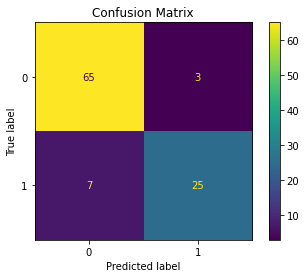

In [77]:
from sklearn.metrics import plot_confusion_matrix

# Plot the confusion matrix
plot_confusion_matrix(ans, xtest, ytest)
plt.title('Confusion Matrix')
plt.show()


In [68]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        68
           1       0.89      0.78      0.83        32

    accuracy                           0.90       100
   macro avg       0.90      0.87      0.88       100
weighted avg       0.90      0.90      0.90       100

